In [27]:
from sklearn import datasets, model_selection, tree, ensemble
import numpy as np


In [13]:
dt_digits = datasets.load_digits()
X = dt_digits['data']
y = dt_digits['target']

In [19]:
#1
tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(X,y)
tree_clf_scoring = model_selection.cross_val_score(tree_clf, X, y, cv=10)
answ1 = tree_clf_scoring.mean()
print 'answ1=', answ1

answ1= 0.8331009989313468


In [23]:
#2
bag_clf = ensemble.BaggingClassifier(n_estimators=100)
bag_clf.fit(X,y)
bag_clf_scoring = model_selection.cross_val_score(bag_clf, X, y, cv=10)
answ2 = bag_clf_scoring.mean()
print 'answ2=', answ2

answ2= 0.925982611993942


In [29]:
#3
bag_clf_2 = ensemble.BaggingClassifier(max_features=int(np.sqrt(X.shape[1])), n_estimators=100)
bag_clf_2.fit(X,y)
bag_clf_scoring_2 = model_selection.cross_val_score(bag_clf_2, X, y, cv=10)
answ3 = bag_clf_scoring_2.mean()
print 'answ3=', answ3

answ3= 0.9438423509078613


In [30]:
#4
tree_clf_3 = tree.DecisionTreeClassifier(max_features=int(np.sqrt(X.shape[1])))
bag_clf_3 = ensemble.BaggingClassifier(base_estimator=tree_clf_3, n_estimators=100)
bag_clf_3.fit(X,y)
bag_clf_scoring_3 = model_selection.cross_val_score(bag_clf_3, X, y, cv=10)
answ4 = bag_clf_scoring_3.mean()
print 'answ4=', answ4

answ4= 0.946680004689569


In [31]:
#5
rf = ensemble.RandomForestClassifier(n_estimators=100)
rf.fit(X,y)
rf_scoring = model_selection.cross_val_score(rf, X, y, cv=10)
rf_score_mean = rf_scoring.mean()
print 'rf_score_mean=', rf_score_mean

rf_score_mean= 0.9533226226537612


In [35]:
#оценка от числа деревьев
n_trees = np.array([10, 50, 100, 300, 500, 1000])
m_score = list()
for tree in n_trees:
    rf = ensemble.RandomForestClassifier(n_estimators=tree)
    rf.fit(X,y)
    rf_scoring = model_selection.cross_val_score(rf, X, y, cv=10)
    m_score.append(rf_scoring.mean())
m_score = np.array(m_score)

In [36]:
print m_score

[0.92428775 0.95007741 0.95608579 0.95500238 0.95221867 0.95054256]


Text(0.5,1,'Dependence Score on the Number of Trees')

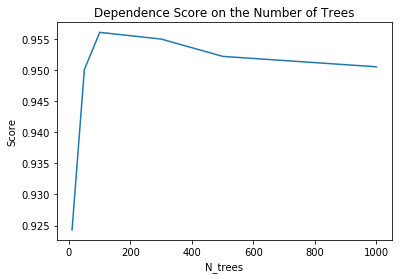

In [40]:
from matplotlib import pyplot as plt
plt.plot(n_trees, m_score)
plt.xlabel('N_trees')
plt.ylabel('Score')
plt.title('Dependence Score on the Number of Trees')

In [45]:
#оценка от колличества признаков
n_fearture = np.array([1,5,10,20,30,40,50,60])
m_score = list()
for fearture in n_fearture:
    rf = ensemble.RandomForestClassifier(max_features=fearture, n_estimators=100)
    rf.fit(X,y)
    rf_scoring = model_selection.cross_val_score(rf, X, y, cv=10)
    m_score.append(rf_scoring.mean())
m_score = np.array(m_score)

In [46]:
print m_score

[0.9511687  0.95058844 0.95170563 0.94894446 0.94438668 0.9394612
 0.9310897  0.928256  ]


Text(0.5,1,'Dependence Score on the Number of fearture')

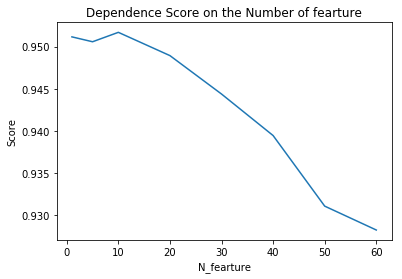

In [47]:
plt.plot(n_fearture, m_score)
plt.xlabel('N_fearture')
plt.ylabel('Score')
plt.title('Dependence Score on the Number of fearture')

In [48]:
#оценка от глубины деревьев
n_depth = np.array([2,3,5,7,10])
m_score = list()
for depth in n_depth:
    rf = ensemble.RandomForestClassifier(max_depth=depth, n_estimators=100)
    rf.fit(X,y)
    rf_scoring = model_selection.cross_val_score(rf, X, y, cv=10)
    m_score.append(rf_scoring.mean())
m_score = np.array(m_score)

In [49]:
print m_score

[0.79568542 0.85318269 0.91817096 0.93660266 0.95224134]


Text(0.5,1,'Dependence Score on the Depth of trees')

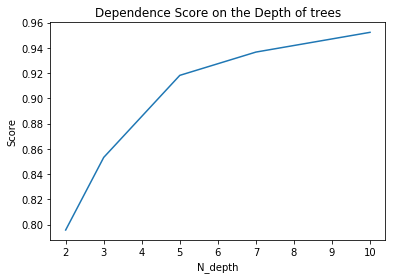

In [50]:
plt.plot(n_depth, m_score)
plt.xlabel('N_depth')
plt.ylabel('Score')
plt.title('Dependence Score on the Depth of trees')

## Выводы: 
1) Случайный лес сильно переобучается с ростом количества деревьев (неправильно)

2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев (правильно)

3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется. (правильно)

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.(правильно)

5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно. (неправильно)

6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается. (неправильно)

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга). (правильно)

# Ответ: 2,3,4,7



In [62]:
print X[10].reshape((8,8))
print y[10]

[[ 0.  0.  1.  9. 15. 11.  0.  0.]
 [ 0.  0. 11. 16.  8. 14.  6.  0.]
 [ 0.  2. 16. 10.  0.  9.  9.  0.]
 [ 0.  1. 16.  4.  0.  8.  8.  0.]
 [ 0.  4. 16.  4.  0.  8.  8.  0.]
 [ 0.  1. 16.  5.  1. 11.  3.  0.]
 [ 0.  0. 12. 12. 10. 10.  0.  0.]
 [ 0.  0.  1. 10. 13.  3.  0.  0.]]
0


In [75]:
def plot_number_by_data(img_data, label):
    plt.figure(1, figsize=(3, 3))
    plt.imshow(img_data.reshape((8,8)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
    plt.title("label is {}".format(label))
    plt.show()

def plot_number_by_index(ind):
    dt = X[ind]
    label = y[ind]
    plot_number_by_data(dt, label)



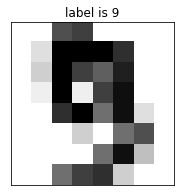

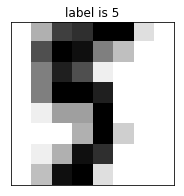

In [80]:
plot_number_by_index(9)
plot_number_by_index(15)

In [81]:
? ensemble.GradientBoostingClassifier

In [82]:
import xgboost as xgb

ImportError: No module named xgboost